In [1]:
import pandas as pd

In [4]:
rtr = pd.read_json('renttherunway_final_data.json', lines=True)

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
fbr_data = pd.DataFrame(rtr.groupby([rtr.fit, rtr.rating]).count()['user_id'])

In [7]:
fbr_data = fbr_data.reset_index()

In [8]:
fbr_data

,fit,rating,user_id
0,fit,2.0,291
1,fit,4.0,998
2,fit,6.0,4986
3,fit,8.0,34967
4,fit,10.0,100753
5,large,2.0,315
6,large,4.0,801
7,large,6.0,2712
8,large,8.0,8790
9,large,10.0,12073


count of users by fit and rating  

<AxesSubplot: xlabel='rating', ylabel='user_id'>

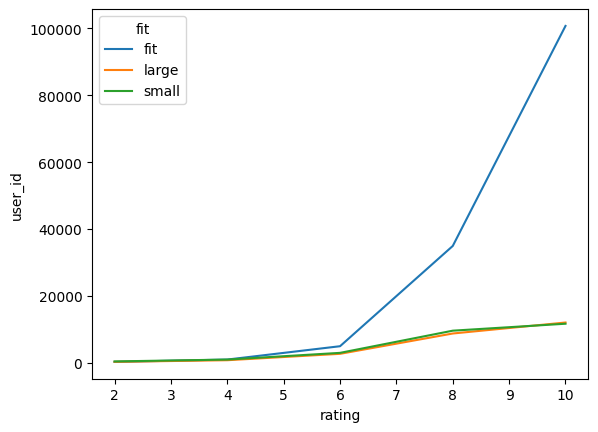

In [9]:
sns.lineplot(data = fbr_data, x = 'rating', y = 'user_id', hue='fit')

In [10]:
rtr = rtr.dropna()

In [11]:
rtr.height = rtr.height.apply(lambda x: str(x))

In [12]:
rtr.height = rtr.height.apply(lambda x: x.replace('"', '').split("\' "))

In [13]:
rtr.height

0         [5, 8]
1         [5, 6]
3         [5, 5]
4         [5, 9]
5         [5, 8]
           ...  
192539    [5, 9]
192540    [5, 1]
192541    [5, 8]
192542    [5, 6]
192543    [5, 6]
Name: height, Length: 146381, dtype: object

In [14]:
rtr.height = rtr.height.apply(lambda x: int(x[0])*12 + int(x[1]))

In [15]:
rtr.height

0         68
1         66
3         65
4         69
5         68
          ..
192539    69
192540    61
192541    68
192542    66
192543    66
Name: height, Length: 146381, dtype: int64

In [16]:
rtr = rtr.rename(columns={'body type': 'body_type', 'bust size':'bust_size'})

In [17]:
rtr.weight = rtr.weight.apply(lambda x: x.replace('lbs', ''))

In [18]:
rtr.weight = rtr.weight.astype(int)

In [19]:
import re

In [20]:
rtr.bust_size

0          34d
1          34b
3          34c
4          34b
5          32b
          ... 
192539    34dd
192540     32c
192541     36a
192542     36c
192543     36b
Name: bust_size, Length: 146381, dtype: object

In [21]:
rtr.bust_size = rtr.bust_size.apply(lambda x: re.split(r"(\d\d)(\D*)", x))

In [22]:
rtr.bust_size = rtr.bust_size.apply(lambda x: [a for a in x if a!=''])

In [23]:
rtr.bust_size

0          [34, d]
1          [34, b]
3          [34, c]
4          [34, b]
5          [32, b]
            ...   
192539    [34, dd]
192540     [32, c]
192541     [36, a]
192542     [36, c]
192543     [36, b]
Name: bust_size, Length: 146381, dtype: object

In [24]:
cup_dict = {'aa':0.0, 'a': 0.05, 'b':0.1, 'c':0.2, 'd':0.3, 'dd':0.33, 'd+':0.35,'ddd/e':0.4,'e':0.4, 'f':0.5, 'g':0.6, 'h':0.7, 'i':0.8, 'j':0.9}

In [25]:
rtr.bust_size = rtr.bust_size.apply(lambda x: float(x[0]) + float(cup_dict.get(x[1])))

In [26]:
rtr.bust_size

0         34.30
1         34.10
3         34.20
4         34.10
5         32.10
          ...  
192539    34.33
192540    32.20
192541    36.05
192542    36.20
192543    36.10
Name: bust_size, Length: 146381, dtype: float64

In [27]:
rtr

,fit,user_id,bust_size,item_id,weight,rating,rented for,review_text,body_type,review_summary,category,height,size,age,review_date
0,fit,420272,34.30,2260466,137,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,68,14,28.0,"April 20, 2016"
1,fit,273551,34.10,153475,132,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,66,12,36.0,"June 18, 2013"
3,fit,909926,34.20,126335,135,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,65,8,34.0,"February 12, 2014"
4,fit,151944,34.10,616682,145,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,69,12,27.0,"September 26, 2016"
5,fit,734848,32.10,364092,138,8.0,date,Didn't actually wear it. It fit perfectly. The...,athletic,Traditional with a touch a sass,dress,68,8,45.0,"April 30, 2016"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,fit,66386,34.33,2252812,140,10.0,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,69,8,42.0,"May 18, 2016"
192540,fit,118398,32.20,682043,100,10.0,work,The pattern contrast on this dress is really s...,petite,LOVE it!,dress,61,4,29.0,"September 30, 2016"
192541,fit,47002,36.05,683251,135,6.0,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",dress,68,8,31.0,"March 4, 2016"
192542,fit,961120,36.20,126335,165,10.0,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,dress,66,16,31.0,"November 25, 2015"


In [28]:
cols_to_drop=['item_id', 'review_date']

In [29]:
rtr = rtr.drop(columns=cols_to_drop)

In [30]:
text_cols = ['review_text', 'review_summary']

In [31]:
rtr = rtr.drop(columns=text_cols)

In [32]:
from sklearn.preprocessing import LabelBinarizer

In [33]:
lb = LabelBinarizer()

In [34]:
rtr = rtr.join(pd.DataFrame(
        data=lb.fit_transform(rtr["rented for"]),
        columns=lb.classes_,
        index=rtr.index,
    )).drop(columns='rented for')

In [35]:
rtr = rtr.join(pd.DataFrame(
        data=lb.fit_transform(rtr["body_type"]),
        columns=lb.classes_,
        index=rtr.index,
    )).drop(columns='body_type')

In [36]:
list(rtr.columns)

['fit',
 'user_id',
 'bust_size',
 'weight',
 'rating',
 'category',
 'height',
 'size',
 'age',
 'date',
 'everyday',
 'formal affair',
 'other',
 'party',
 'party: cocktail',
 'vacation',
 'wedding',
 'work',
 'apple',
 'athletic',
 'full bust',
 'hourglass',
 'pear',
 'petite',
 'straight & narrow']

In [37]:
rtr = rtr.rename(columns={ 'formal affair': 'formal_affair', 'party: cocktail':'cocktail', 'straight & narrow':'straight_narrow', 'full bust':'full_bust'})

In [38]:
rtr = rtr.join(pd.DataFrame(
        data=lb.fit_transform(rtr["category"]),
        columns=lb.classes_,
        index=rtr.index,
    )).drop(columns='category')

In [39]:
target = ['fit']

In [40]:
ids = ['user_id']

try dropping rating bc its so indicative

In [41]:
features = list(rtr.drop(columns=ids+target+['rating']).columns)

In [42]:
import xgboost as xgb

try out a multi class xgboost problem

In [49]:
model = xgb.XGBClassifier(objective='multi:softproba', max_depth=5) #or use softmax

In [50]:
rtr

,fit,user_id,bust_size,weight,rating,height,size,age,date,everyday,...,tank,tee,tight,top,trench,trouser,trousers,tunic,turtleneck,vest
0,0.0,420272,34.30,137,10.0,68,14,28.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,273551,34.10,132,10.0,66,12,36.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,909926,34.20,135,8.0,65,8,34.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,151944,34.10,145,10.0,69,12,27.0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.0,734848,32.10,138,8.0,68,8,45.0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,0.0,66386,34.33,140,10.0,69,8,42.0,0,0,...,0,0,0,0,0,0,0,0,0,0
192540,0.0,118398,32.20,100,10.0,61,4,29.0,0,0,...,0,0,0,0,0,0,0,0,0,0
192541,0.0,47002,36.05,135,6.0,68,8,31.0,0,1,...,0,0,0,0,0,0,0,0,0,0
192542,0.0,961120,36.20,165,10.0,66,16,31.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder()
rtr.fit = ordenc.fit_transform(rtr[['fit']])

In [53]:
rtr.fit.value_counts()

0.0    107733
2.0     19622
1.0     19026
Name: fit, dtype: int64

In [54]:
X_train, X_test, y_train, y_test = train_test_split(rtr[features], rtr[target], test_size=0.3, random_state=1)

In [55]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [60]:
preds = model.predict(X_test)

In [61]:
preds

array([0, 0, 0, ..., 0, 0, 0])

In [62]:
from sklearn.metrics import accuracy_score

In [63]:
accuracy = accuracy_score(y_test, preds)

In [64]:
accuracy

0.7358305818057611

In [65]:
from sklearn.metrics import roc_auc_score

In [66]:
X_test

,bust_size,weight,height,size,age,date,everyday,formal_affair,other,party,...,tank,tee,tight,top,trench,trouser,trousers,tunic,turtleneck,vest
143944,32.30,108,62,1,22.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
156887,38.10,155,68,20,59.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62668,36.20,130,66,12,35.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72202,34.10,133,65,12,34.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
126404,32.30,145,70,12,28.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114329,34.10,126,66,4,32.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
94034,34.05,115,63,8,30.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
61,32.05,110,66,4,24.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
178349,32.20,128,67,4,30.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')

0.651937029115155

In [68]:
roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')

0.651937029115155

In [69]:
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import cross_validate

In [70]:
def cross_validate_scores(
    rtr,
    model = xgb.XGBClassifier(objective='multi:softproba', max_depth=5),
    n_grps: int = 5
):

    scorers = {
        "accuracy": "accuracy"}
    
    #    "precision": "precision",
    #    "recall": "recall",
    #    "AUCPR": "average_precision"
    #}

    gkf = GroupKFold(n_splits=n_grps)

    dfy = rtr[target]
    dfx = rtr[features]
    print(dfx.shape)
    print(dfy.shape)
    cv_results = cross_validate(
        estimator=model,
        X=dfx,
        y=dfy,
        scoring=scorers,
        cv=gkf,
        groups=rtr['user_id'],
        verbose = 1,
        return_estimator = True
    )
    
    return cv_results

In [71]:
cv_scores = cross_validate_scores(rtr)

(146381, 89)
(146381, 1)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
cv_scores

{'fit_time': array([106.159477  , 109.12256408, 109.77666688, 105.64432478,
        105.65561104]),
 'score_time': array([0.20313215, 0.23206401, 0.19142032, 0.21323299, 0.19789886]),
 'estimator': [XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
                grow_policy='depthwise', importance_type=None,
                interaction_constraints='', learning_rate=0.300000012,
                max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
                max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
                missing=nan, monotone_constraints='()', n_estimators=100,
                n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
                predictor='auto', ...),
  XGBClassifier(base_score=0.5, booster=

In [ ]:
import numpy as np

In [ ]:
def get_feat_imp_dict(cv_results):
    df_dict = {}
    for estimator in cv_results["estimator"]:
        features = estimator.get_booster().feature_names,
        importances = estimator.feature_importances_

        # features is tuple
        for i, feature in enumerate(features[0]):
            df_dict.setdefault(feature, []).append(importances[i])
            
    df_dict_means = {
        key: {"mean": np.mean(values), "std": np.std(values)}
        for key, values in df_dict.items()
    }
    
    feature_importances_df = pd.DataFrame.from_dict(df_dict_means, orient = "index").sort_values("mean", ascending = False).reset_index().rename(columns = {"index": "feature"})    
    return feature_importances_df

In [ ]:
fi_dict = get_feat_imp_dict(cv_scores)

drop features with zero importance

In [ ]:
fi_dict[fi_dict['mean']==0]

,feature,mean,std
84,sweatpants,0.0,0.0
85,overcoat,0.0,0.0
86,cocktail,0.0,0.0
87,crewneck,0.0,0.0
88,buttondown,0.0,0.0


In [ ]:
fs_remove = ['sweatpants', 'overcoat', 'cocktail', 'crewneck', 'buttondown']

In [ ]:
top_features = fi_dict.head(30)

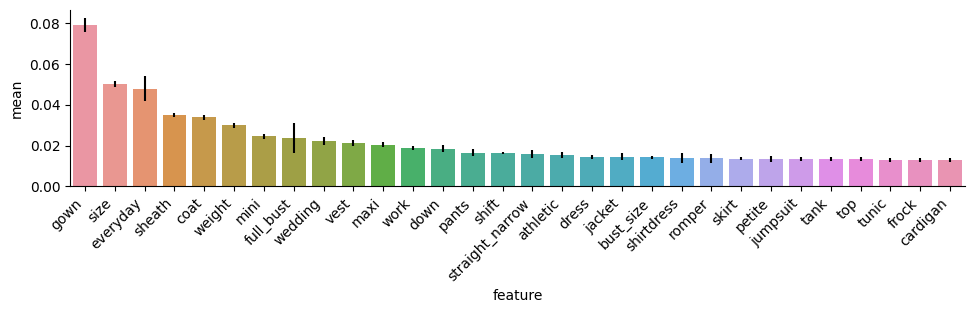

In [ ]:
fg = sns.catplot(
    kind = "bar",
    data = top_features,
    x = "feature",
    y = "mean",
    height = 2.5,
    aspect=4,
    dodge = False,
    yerr = top_features["std"])

xticks = fg.axes[0,0].get_xticks()
xticklabels = fg.axes[0,0].get_xticklabels()
xticklabels = [label.get_text() for label in xticklabels]
plt.xticks(rotation = 45, ha = "right")
None

In [ ]:
np.unique(preds)

array([0, 1, 2])

In [ ]:
y_test = y_test.drop('pred', axis=1)

In [ ]:
y_test

,fit
143944,0.0
156887,0.0
62668,2.0
72202,2.0
126404,0.0
...,...
114329,0.0
94034,0.0
61,0.0
178349,0.0


In [ ]:
len(preds)

43915

In [ ]:
y_test_pred = y_test.copy()

In [ ]:
y_test_pred['pred'] = preds

In [ ]:
y_test_pred

,fit,pred
143944,0.0,0
156887,0.0,0
62668,2.0,0
72202,2.0,0
126404,0.0,0
...,...,...
114329,0.0,0
94034,0.0,0
61,0.0,0
178349,0.0,0


In [ ]:
y_test_pred.value_counts()

fit  pred
0.0  0       32138
2.0  0        5732
1.0  0        5681
0.0  2         115
2.0  2          97
1.0  1          79
0.0  1          55
1.0  2          13
2.0  1           5
dtype: int64

In [ ]:
y_fit_0 = y_test_pred[y_test_pred['fit']==0]

In [ ]:
y_fit_1 = y_test_pred[y_test_pred['fit']==1]

In [ ]:
y_fit_2 = y_test_pred[y_test_pred['fit']==2]

In [ ]:
from sklearn.metrics import average_precision_score

In [ ]:
fit = y_test_pred.drop('pred', axis = 1)
pred = y_test_pred.drop('fit', axis = 1)

In [ ]:
roc_auc_score(fit, pred, multi_class='ovo')

ValueError: multi_class must be in ('ovo', 'ovr')

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(fit, pred, average='macro')

0.3020175374372765

build your own ensemble

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

xgb_clf = xgb.XGBClassifier(random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('xgb', xgb_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')


In [151]:
voting_clf.fit(X_train, y_train)

/Users/gabylorenzi/Desktop/rtr/.venv/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gabylorenzi/Desktop/rtr/.venv/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=42, ...)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [200]:
from sklearn.metrics import accuracy_score

for clf in (xgb_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

XGBClassifier 0.7355117841284299


/var/folders/ds/bsldyvrn77s_p63zz5szjwkr0000gn/T/ipykernel_15469/3582699854.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestClassifier 0.714152339747239


/Users/gabylorenzi/Desktop/rtr/.venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC 0.735693954229762


/Users/gabylorenzi/Desktop/rtr/.venv/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gabylorenzi/Desktop/rtr/.venv/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


soft voting

In [ ]:
svm_soft_clf = SVC(gamma="scale", random_state=42, probability=True)


In [ ]:
soft_voting_clf = VotingClassifier(
    estimators=[('xgb', xgb_clf), ('rf', rnd_clf), ('svc', svm_soft_clf)],
    voting='soft')
soft_voting_clf.fit(X_train, y_train)

In [ ]:
for clf in (xgb_clf, rnd_clf, svm_soft_clf, soft_voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


bagging and pasting

another approach is to use the same training algorithm for every predictor but train them on different random subsets of the training set. when 

In [152]:
rtr

,fit,user_id,bust_size,weight,rating,height,size,age,date,everyday,...,tank,tee,tight,top,trench,trouser,trousers,tunic,turtleneck,vest
0,0.0,420272,34.30,137,10.0,68,14,28.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,273551,34.10,132,10.0,66,12,36.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,909926,34.20,135,8.0,65,8,34.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,151944,34.10,145,10.0,69,12,27.0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.0,734848,32.10,138,8.0,68,8,45.0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,0.0,66386,34.33,140,10.0,69,8,42.0,0,0,...,0,0,0,0,0,0,0,0,0,0
192540,0.0,118398,32.20,100,10.0,61,4,29.0,0,0,...,0,0,0,0,0,0,0,0,0,0
192541,0.0,47002,36.05,135,6.0,68,8,31.0,0,1,...,0,0,0,0,0,0,0,0,0,0
192542,0.0,961120,36.20,165,10.0,66,16,31.0,0,0,...,0,0,0,0,0,0,0,0,0,0
